In [2]:
## Importing the Required Libraries

In [15]:
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [16]:
## Preparing the Data

In [17]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f) 
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)


In [18]:
stopwords = stopwords.words("english")
print (stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Coherence Score: 0.3551400461080917


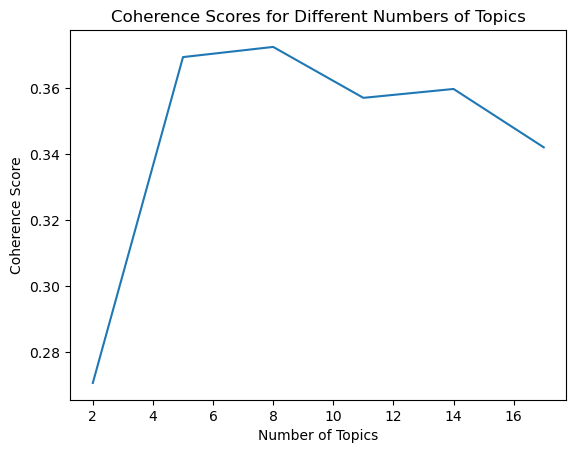

Topic: 0
Words: 0.059*"brother" + 0.033*"city" + 0.025*"kill" + 0.015*"run" + 0.015*"couple" + 0.013*"afraid" + 0.012*"woman" + 0.010*"lot" + 0.009*"money" + 0.008*"alive"

Topic: 1
Words: 0.034*"course" + 0.016*"prisoner" + 0.012*"on" + 0.009*"really" + 0.006*"government" + 0.006*"prison" + 0.006*"ship" + 0.006*"office" + 0.006*"community" + 0.005*"also"

Topic: 2
Words: 0.042*"use" + 0.010*"walk" + 0.010*"town" + 0.010*"barrack" + 0.009*"kill" + 0.009*"guy" + 0.007*"transport" + 0.006*"ghetto" + 0.006*"water" + 0.006*"shoot"

Topic: 3
Words: 0.045*"remember" + 0.032*"girl" + 0.021*"sister" + 0.018*"mother" + 0.017*"really" + 0.017*"woman" + 0.013*"child" + 0.011*"dutch" + 0.009*"apartment" + 0.008*"shoe"

Topic: 4
Words: 0.043*"brother" + 0.042*"away" + 0.032*"kind" + 0.029*"mean" + 0.022*"save" + 0.013*"hungarian" + 0.013*"course" + 0.012*"actually" + 0.011*"horse" + 0.010*"legation"

Topic: 5
Words: 0.047*"over" + 0.032*"army" + 0.023*"kill" + 0.023*"polish" + 0.020*"fight" + 0.016

D:\anaconda\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.341085 -0.064885       1        1  20.501877
2      0.070877  0.045932       2        1  20.415638
7     -0.251273  0.257058       3        1  13.946830
3      0.240959 -0.233042       4        1  12.548793
9      0.275392 -0.015885       5        1   8.708475
5      0.262957  0.202393       6        1   6.733039
8      0.051918  0.310551       7        1   6.541528
0      0.039665 -0.304159       8        1   5.338718
6     -0.181937  0.057749       9        1   3.129967
4     -0.167472 -0.255711      10        1   2.135135, topic_info=         Term         Freq        Total Category  logprob  loglift
337    ghetto  2229.000000  2229.000000  Default  30.0000  30.0000
663  remember  1093.000000  1093.000000  Default  29.0000  29.0000
852       use  1679.000000  1679.000000  Default  28.0000  28.0000
187    course  1384.000000  1384.000000  Default  27.0000  27.0000
111   brother   830.000000   830.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
98       bomb    19.499221   187.383354  Topic10  -5.3492   1.5839
440      kill    28.494691  1298.672267  Topic10  -4.9699   0.0273
439       kid    21.258639   384.503964  Topic10  -5.2628   0.9514
115  building    17.362134   353.565205  Topic10  -5.4653   0.8329
350     great    16.300755   255.029241  Topic10  -5.5284   1.0965

[708 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.283484     able
0         3  0.004200     able
0         5  0.657262     able
0         7  0.002100     able
0         8  0.052497     able
...     ...       ...      ...
2551      1  0.016236  zionist
2551      3  0.032471  zionist
2551      7  0.032471  zionist
2551      8  0.097414  zionist
2551      9  0.811786  zionist

[1517 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 8, 4, 10, 6, 9, 1, 7, 5])

In [19]:
# Load your data
data = load_data("C:/Users/Khali/topicmodeling/data/text.json")["texts"]

# Lemmatization
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = [token.lemma_ for token in doc if token.pos_ in allowed_postags]
        final = " ".join(new_text)
        texts_out.append(final)
    return texts_out

lemmatized_texts = lemmatization(data)

# Tokenize words and clean-up text
def gen_words(texts):
    return [gensim.utils.simple_preprocess(text, deacc=True) for text in texts]

data_words = gen_words(lemmatized_texts)

# Bigrams and Trigrams
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram[bigram[doc]] for doc in texts]

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

# Create Dictionary and Corpus
id2word = corpora.Dictionary(data_bigrams_trigrams)
texts = data_bigrams_trigrams
corpus = [id2word.doc2bow(text) for text in texts]

# TF-IDF Removal
tfidf = TfidfModel(corpus, id2word=id2word)
low_value = 0.03
for i in range(len(corpus)):
    bow = corpus[i]
    tfidf_ids = [id for id, value in tfidf[bow]]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    corpus[i] = [b for b in bow if b[0] not in low_value_words and b[0] in tfidf_ids]

# Train LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                            id2word=id2word,
                                            num_topics=10,  # Adjust number of topics
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,  # Increase passes for better training
                                            alpha="auto")

# Compute Coherence Score
def compute_coherence_score(model, texts, dictionary, corpus):
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, corpus=corpus, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

coherence_score = compute_coherence_score(lda_model, data_bigrams_trigrams, id2word, corpus)
print(f"Coherence Score: {coherence_score}")

# Find Optimal Number of Topics
def find_optimal_number_of_topics(dictionary, corpus, texts, start=2, limit=20, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto')
        model_list.append(model)
        coherence_values.append(compute_coherence_score(model, texts, dictionary, corpus))
    return model_list, coherence_values

model_list, coherence_values = find_optimal_number_of_topics(id2word, corpus, data_bigrams_trigrams)

# Plot Coherence Values
x = range(2, 20, 3)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.show()

# Display Top Words in Each Topic
def display_top_words(model, num_words=10):
    for idx, topic in model.print_topics(-1, num_words=num_words):
        print(f"Topic: {idx}\nWords: {topic}\n")

display_top_words(lda_model)

# Save and Load LDA Model
def save_lda_model(model, filepath):
    model.save(filepath)

def load_lda_model(filepath):
    return gensim.models.ldamodel.LdaModel.load(filepath)

save_lda_model(lda_model, "lda_model.model")
loaded_model = load_lda_model("lda_model.model")
display_top_words(loaded_model)

# Visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis
